In [2]:
!pip install pyxdf
!pip install mne
!pip install pandas
!pip install --upgrade jupyterlab ipympl ipywidgets

In [3]:
import sys
print(sys.version)

3.11.13 (main, Sep 22 2025, 18:50:24) [Clang 17.0.0 (clang-1700.0.13.5)]


In [4]:
import pyxdf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mne
import pandas as pd
import os

In [1]:
csv_data = pd.read_csv('data/luka_n400.csv')
# csv_data = pd.read_csv('data/nani_n400.csv')
csv_data.head()

NameError: name 'pd' is not defined

In [2]:
related_idx = csv_data[csv_data['condition'] == 'related'].index.values
unrelated_idx = csv_data[csv_data['condition'] == 'unrelated'].index.values

NameError: name 'csv_data' is not defined

In [7]:
related_idx

array([  2,   3,   4,   7,  12,  13,  16,  17,  21,  23,  25,  26,  27,
        29,  32,  33,  36,  41,  42,  45,  49,  52,  55,  56,  59,  60,
        61,  63,  66,  69,  71,  73,  75,  77,  81,  82,  83,  85,  86,
        87,  89,  90,  91,  93,  94,  97,  98,  99, 102, 104, 105, 106,
       109, 110, 111, 114, 115, 116, 118, 119])

In [8]:
unrelated_idx

array([  0,   1,   5,   6,   8,   9,  10,  11,  14,  15,  18,  19,  20,
        22,  24,  28,  30,  31,  34,  35,  37,  38,  39,  40,  43,  44,
        46,  47,  48,  50,  51,  53,  54,  57,  58,  62,  64,  65,  67,
        68,  70,  72,  74,  76,  78,  79,  80,  84,  88,  92,  95,  96,
       100, 101, 103, 107, 108, 112, 113, 117])

In [9]:
xdf_path = './data/nani_n400.xdf'
xdf_data = pyxdf.load_xdf(xdf_path)[0]
markers = xdf_data[0]
eeg = xdf_data[2]

Stream 1: Calculated effective sampling rate 0.0000 Hz is different from specified rate 250.0000 Hz.


In [26]:
# Redefine for Luka's data
xdf_path = './data/luka_n400.xdf'
xdf_data = pyxdf.load_xdf(xdf_path)[0]
markers = xdf_data[0]
eeg = xdf_data[1]

In [11]:
# Read marker data
marker_time = markers['time_stamps']
time_offset = marker_time[0]
marker_time = marker_time - time_offset
marker_data = [x[0] for x in markers['time_series']]

In [12]:
# n400_data = ExperimentData('data/nani_n400.xdf')

In [13]:
CONST_OFFSET = 0.073  # Delay measured with photodiode that day

In [14]:
eeg_time = eeg['time_stamps']
eeg_time = eeg_time - time_offset - CONST_OFFSET
eeg_data = eeg['time_series'][:, :8]

In [15]:
# Create raw data
info = mne.create_info(ch_names=['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8'], ch_types=['eeg'] * 8,
                       sfreq=250)
raw = mne.io.RawArray([1e-6 * eeg_data[:, i] for i in range(8)], info)
raw.notch_filter(freqs=[50])
raw.filter(0.5, 30)
raw

Creating RawArray with float64 data, n_channels=8, n_times=92753
    Range : 0 ... 92752 =      0.000 ...   371.008 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband att

<RawArray | 8 x 92753 (371.0 s), ~5.7 MiB, data loaded>

In [16]:
TARGET_MARKER = 1
RESPONSE_MARKER = 2

In [17]:
events = []
for i, marker in enumerate(marker_data):
    eeg_start_index = np.argmax(eeg_time >= marker_time[i]) - 1
    events.append([eeg_start_index, 0, marker])
events = np.array(events)

In [18]:
events

array([[ 8790,     0,     1],
       [ 8956,     0,     2],
       [ 9468,     0,     1],
       [ 9618,     0,     2],
       [10188,     0,     1],
       [10312,     0,     2],
       [10883,     0,     1],
       [11070,     0,     2],
       [11615,     0,     1],
       [11789,     0,     2],
       [12289,     0,     1],
       [12468,     0,     2],
       [12984,     0,     1],
       [13204,     0,     2],
       [13653,     0,     1],
       [13870,     0,     2],
       [14349,     0,     1],
       [14573,     0,     2],
       [15031,     0,     1],
       [15235,     0,     2],
       [15730,     0,     1],
       [15950,     0,     2],
       [16387,     0,     1],
       [16608,     0,     2],
       [17049,     0,     1],
       [17290,     0,     2],
       [17748,     0,     1],
       [17939,     0,     2],
       [18409,     0,     1],
       [18580,     0,     2],
       [19062,     0,     1],
       [19275,     0,     2],
       [19741,     0,     1],
       [19

In [19]:
picks = ["Cz", "Pz"]
event_dict = dict(target=1)
tmin, tmax = -0.2, 1
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=tmin, tmax=tmax, preload=True,
                    baseline=(None, 0 if tmin < 0 else None), picks=picks)

Not setting metadata
121 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 121 events and 301 original time points ...
0 bad epochs dropped


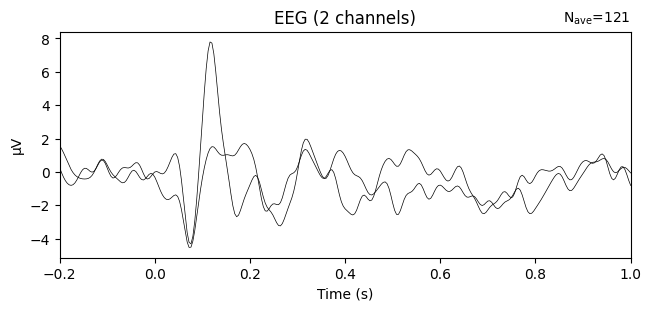

In [20]:
epochs.average().plot(picks=picks)
plt.show()

combining channels using "mean"


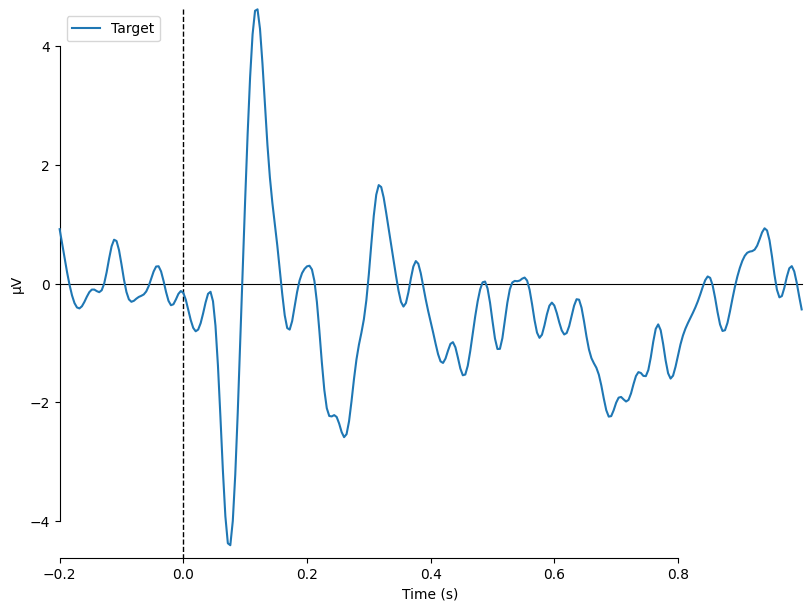

[<Figure size 800x600 with 1 Axes>]

In [21]:
mne.viz.plot_compare_evokeds(
    {"Target": epochs['target'].average()},
    combine='mean',
    show=True
)

In [22]:
related_epochs = epochs[related_idx]
unrelated_epochs = epochs[unrelated_idx]

combining channels using "mean"
combining channels using "mean"


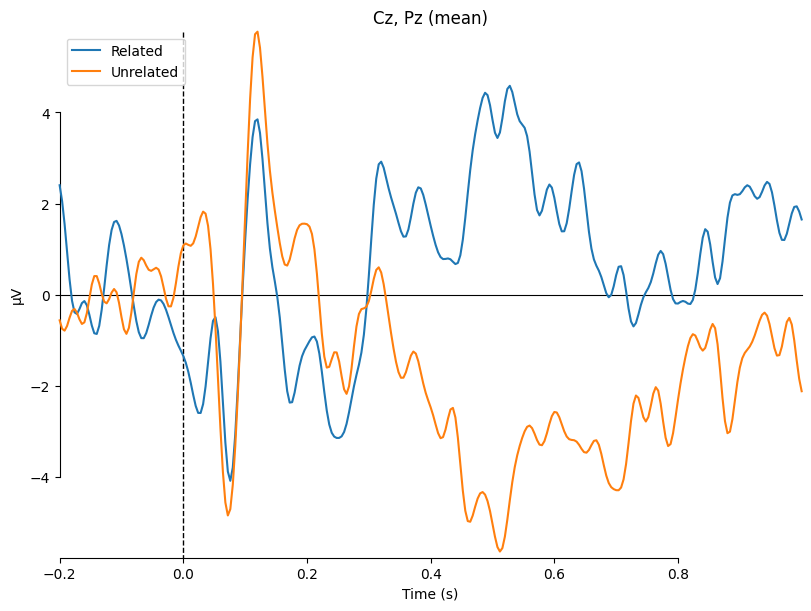

[<Figure size 800x600 with 1 Axes>]

In [23]:
mne.viz.plot_compare_evokeds(
    {"Related": related_epochs.average(), "Unrelated": unrelated_epochs.average()},
    picks=picks,
    combine='mean',
    show=True
)

In [24]:
epochs

<Epochs | 121 events (all good), -0.2 – 1 s (baseline -0.2 – 0 s), ~576 KiB, data loaded,
 'target': 121>